## Predicting Wine Quality

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('winequality-white.csv', sep=";")

#setting up features (x) and target (y)
x = df.drop(columns=['quality'])
y = df['quality']

#split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Linear Regression

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model (Linear Regression)
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.5690247717229232
Mean Absolute Error (MAE): 0.5862665383250459
R-squared (R²): 0.2652750042179184


Random Forest

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Random Forest Regressor, fit to data, and predict
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", n_jobs=-1, random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.3348426530612245
Mean Absolute Error (MAE): 0.41416326530612246
R-squared (R²): 0.5676510424789326


## Feature Importance

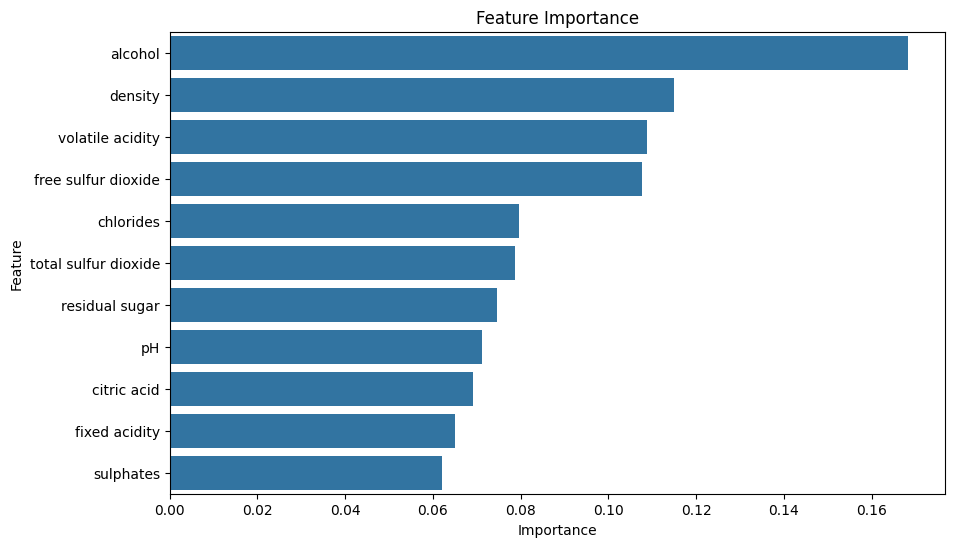

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance scores
feature_importances = rf_model.feature_importances_

# Map importance scores to feature names
importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

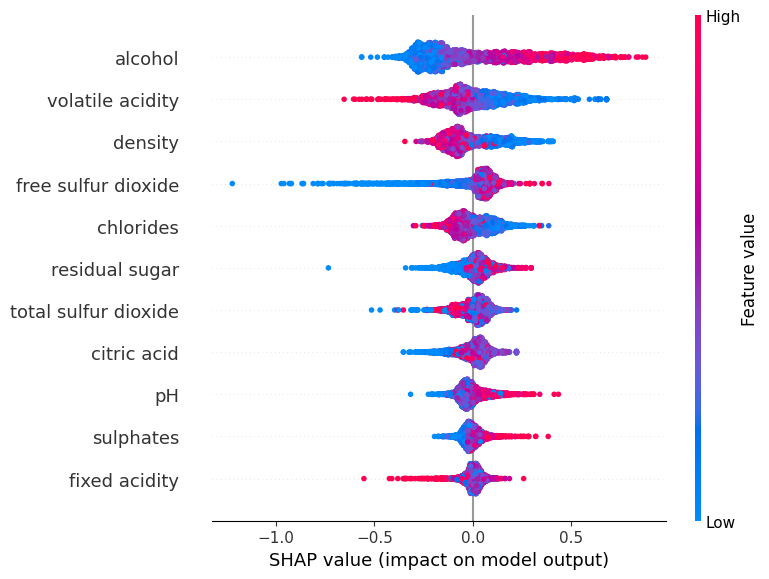

In [ ]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(x_train)

# Summary plot of feature importance
shap.summary_plot(shap_values, x_train)

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

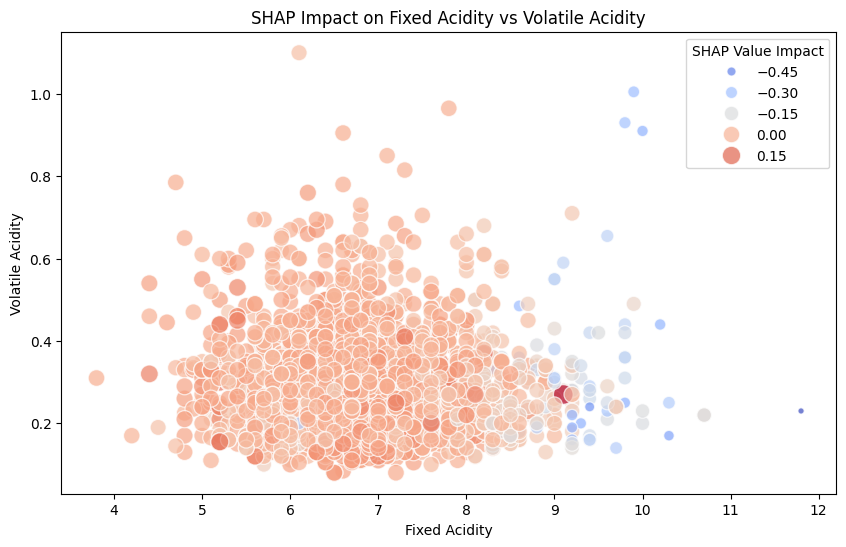

In [17]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Generate SHAP values for the training dataset
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(x_train)

# Create a scatter plot for Fixed Acidity vs Volatile Acidity with SHAP values as the color intensity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_train['fixed acidity'], y=x_train['volatile acidity'], 
                hue=shap_values[:, x_train.columns.get_loc('fixed acidity')], 
                palette='coolwarm', size=shap_values[:, x_train.columns.get_loc('fixed acidity')],
                sizes=(20, 200), marker='o', alpha=0.7)

plt.title('SHAP Impact on Fixed Acidity vs Volatile Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.legend(title="SHAP Value Impact", loc='upper right')
plt.colorbar(label='SHAP Value Impact')
plt.show()


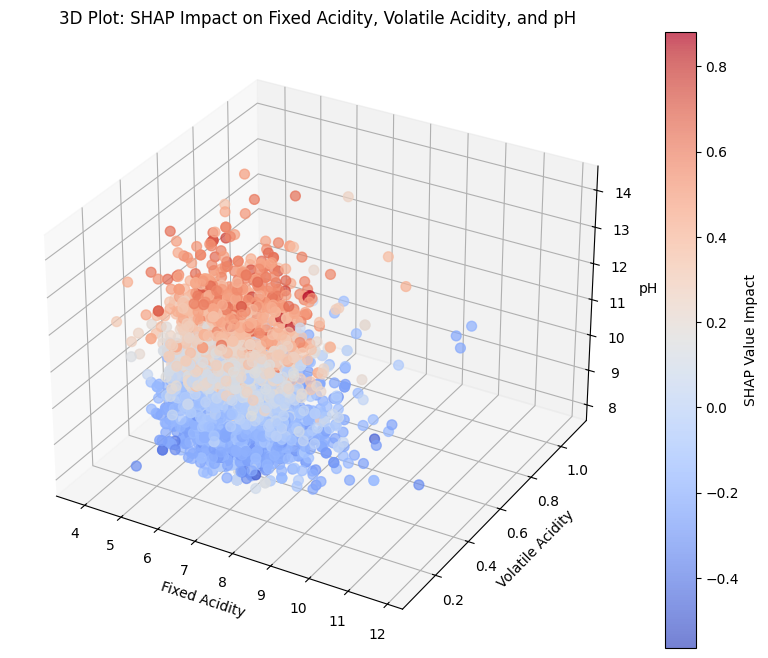

In [20]:
import shap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create SHAP values for the dataset
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(x_train)

# Get SHAP values for the fixed acidity feature, for example
shap_fixed_acidity = shap_values[:, x_train.columns.get_loc('alcohol')]

# 3D Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Get the features for Fixed Acidity, Volatile Acidity, and pH
x = x_train['fixed acidity']
y = x_train['volatile acidity']
z = x_train['alcohol']

# Plotting the 3D scatter plot with SHAP values influencing color
scatter = ax.scatter(x, y, z, c=shap_fixed_acidity, cmap='coolwarm', s=50, alpha=0.7)

# Set labels for the axes
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('pH')

# Add color bar to represent SHAP value impact
fig.colorbar(scatter, label='SHAP Value Impact')

# Set title
plt.title('3D Plot: SHAP Impact on Fixed Acidity, Volatile Acidity, and pH')

# Show the plot
plt.show()


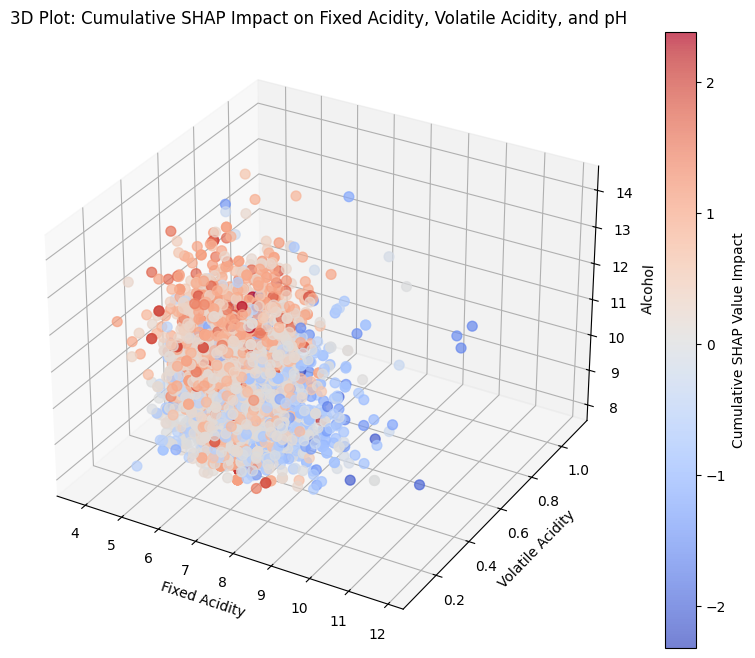

In [22]:
import shap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate SHAP values for the training dataset
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(x_train)

# Calculate cumulative SHAP values for each sample by summing over all features
cumulative_shap_values = np.sum(shap_values, axis=1)

# 3D Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Get the features for Fixed Acidity, Volatile Acidity, and pH
x = x_train['fixed acidity']
y = x_train['volatile acidity']
z = x_train['alcohol']

# Plotting the 3D scatter plot with cumulative SHAP values influencing color
scatter = ax.scatter(x, y, z, c=cumulative_shap_values, cmap='coolwarm', s=50, alpha=0.7)

# Set labels for the axes
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('Alcohol')

# Add color bar to represent cumulative SHAP value impact
fig.colorbar(scatter, label='Cumulative SHAP Value Impact')

# Set title
plt.title('3D Plot: Cumulative SHAP Impact on Fixed Acidity, Volatile Acidity, and pH')

# Show the plot
plt.show()


In [ ]:
import shap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate SHAP values for the training dataset
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(x_train)

# Calculate cumulative SHAP values for each sample by summing over all features
cumulative_shap_values = np.sum(shap_values, axis=1)

# 3D Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Get the features for Fixed Acidity, Volatile Acidity, and pH
x = x_train['volatile acidity']
y = x_train['density']
z = x_train['alcohol']

# Plotting the 3D scatter plot with cumulative SHAP values influencing color
scatter = ax.scatter(x, y, z, c=cumulative_shap_values, cmap='coolwarm', s=50, alpha=0.7)

# Set labels for the axes
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('Alcohol')

# Add color bar to represent cumulative SHAP value impact
fig.colorbar(scatter, label='Cumulative SHAP Value Impact')

# Set title
plt.title('3D Plot: Cumulative SHAP Impact on Fixed Acidity, Volatile Acidity, and pH')

# Show the plot
plt.show()
